# Implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df=pd.read_csv('./data/Social_Network_Ads.csv')
X=df.iloc[:,2:-1].values
y=df.iloc[:,-1:].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=0)

#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

/home/nancy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nancy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nancy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
# Fitting Logistic regression into the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

#Predicting test set results
y_pred=classifier.predict(X_test)

/home/nancy/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nancy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 8, 24]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


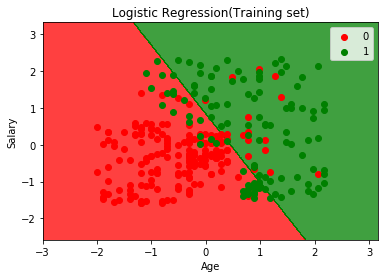

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


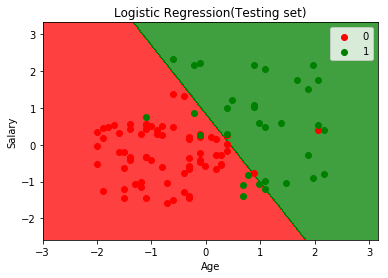

In [59]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,
             cmap=ListedColormap(['red','green']))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set[:,0]==j,0],X_set[y_set[:,0]==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title("Logistic Regression(Training set)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()

# Visualizing the testing set results
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,
             cmap=ListedColormap(['red','green']))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set[:,0]==j,0],X_set[y_set[:,0]==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title("Logistic Regression(Testing set)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()

# Questions

## Is Logistic Regression a linear or non linear model?
It is a linear model. You will visualize this at the end of the section when seeing that the classiﬁer’s separator
is a straight line.

## Logistic Regression assumptions
1. binary logistic regression requires the **dependent variable to be binary** and ordinal logistic regression requires the dependent variable to be ordinal.

2. logistic regression requires the **observations to be independent of each other**. In other words, the observations should not come from repeated measurements or matched data.

3. logistic regression requires there to be little or **no multicollinearity** among the independent variables. This means that the independent variables should not be too highly correlated with each other.

4. logistic regression assumes **linearity of independent variables and log odds**. although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

## Can Logistic Regression be used for many independent variables as well?
Yes, Logistic Regression can be used for as many independent variables as you want. However be aware that
you won’t be able to visualize the results in more than 3 dimensions.

## What does the ﬁt method do here?
The ﬁt method will basically **train the Logistic Regression model on the training data**. Therefore it will
compute and get the weights (coeﬃcients) of the Logistic Regression model for
that particular set of training data composed of X_train and y_train. Then right after it collects the
weights/coeﬃcients, you have a Logistic Regression model fully trained on your training data, and ready to
predict new outcomes thanks to the predict method.

## We predicted the outcomes of a set of observations (the test set). How do we do the same for a single observation, to predict a single outcome?
Let’s say this observation has the following features: Age = 30, Estimated Salary = 50000.
Then the code to get the predicted outcome would be the following (notice how we must not forget to scale
that single observation ﬁrst):
```python
y_pred = classifier.predict(sc_X.transform(np.array([[20, 50000]])))
```

## Is the Confusion Matrix the optimal way to evaluate the performance of the model?
No, it just gives you an idea of how well your model can perform. If you get a good confusion matrix with
few prediction errors on the test set, then there is a chance your model has a good predictive power. However
the most relevant way to evaluate your model is through K-Fold Cross Validation. It consists of evaluating your model on several test sets (called the validation sets), so that we can make
sure we don’t get lucky on one single test set.

## 